## 2. Optimization, Learning & Convex functions

Recall from the lecture, what is the "learning" in machine learning?

Machine learning is learning the parameters from the algorithms (i.e. model) in order to well match from your inputs to your outputs (supervised), or find the data patterns (unsupervised).

Here comes the question? How to find the optimized solution of an ML algorithm?

In this part, we start to discuss about different optimization process when facing analytical solutions (closed-form) and numerical solutions.

### 2.1 Optimization

### 2.1.1 Linear Regression

Linear Regression assumes (model bias!) that the output (dependent) variable is the weighted sum of the input variables. It's often used for:

* Understanding relationships between data intpus and data outputs
* Evaluating trends
* Making forecasts
    
Linear regression assumes that data outputs (Y) can be explained by the data inputs (X=[x0, x1, x2, ...]) via a linear relationship:

$$y=w_0x_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n = \mathbf{w}^T\mathbf{x}$$


Here, the parameters required for learning is $w$. 


The loss function (or objective function) $J$ for the linear regression is the **square error**:

$$J(\mathbf{w}|D) = \sum_{i = 1}^N({y^{(i)}-\widehat{y}^{(i)}})^2 = \sum_{i = 1}^N({y^{(i)}-\mathbf{w}^T\mathbf{x}^{(i)}})^2$$


In this case, we're trying to solve the follwoing optimization problems with the sum of squared errors (i.e. minimize the loss function):

$$\widehat{\mathbf{w}} = argmin_{\mathbf{w}}\sum_{i = 1}^{N}({y_i-\widehat{y_i}})^2 = argmin_{\mathbf{w}} \sum_{i=1}^N({y_i-\mathbf{w}^T\mathbf{x}_i})^2$$

Minimizing the sum of squared errors (SSE) can be understood as finding the best-fitting straight line through the example points. 

From the tutorial, we know that we can easily find the analytical solutions (i.e. closed-form solution) via

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$
where
$(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is the Moore-Penrose pseudoinverse of the matrix $\mathbf{X}$ and is often denoted as $\mathbf{X}^+$.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Exercise 2.1.1 Find the analytical solution of Linear Regression Model
Having a linear regression model $y = (-8) + 3 x_1$

Assume that the data input $x_1$ is generated from **np.linspace(0,10,100)**

And the data outputs are generated via $y = (-8) + 3 x_1 + \epsilon$

1. Create random numpy arrays $x_0$, $x_1$ and noise $\epsilon$
2. Generate data outputs via $y = (-8) + 3 x_1 + \epsilon$
3. Plot the scatter plot to see the data distribution
4. Find the analytical solution of LR model via the upper formula
5. Plot your results

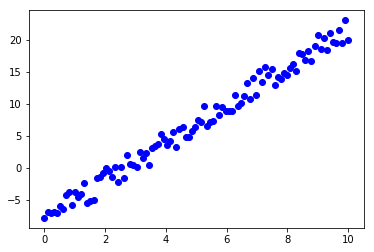

In [0]:
## Create a scenario with the inputs and outputs with linear relationship
# 1. Create random numpy arrays x0, x1 and noise factor delta
np.random.seed(0)
x1 = np.linspace(0,10,100)
x0 = np.ones(100)
delta = np.random.uniform(-2,2, size=(100,))

# 2. Generate data outputs via $y = (-8)*x0 + 3*x1 + delta$
y = (-8)*x0 + 3 * x1+ delta

# 3. Plot the scatter plot to see the data distribution
plt.scatter(x1, y, color = 'blue')
plt.show()

In [0]:
# 4. Find the analytical solution of LR model
class LinearRegression:
    def fit(self, X, y):
        #self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
        self.w = np.linalg.lstsq(X, y, rcond=None)[0]
    def predict(self, X):
        return X.dot(self.w)

In [0]:
np.random.seed(0)
x1 = np.linspace(0,10,100)
x0 = np.ones(100)
delta = np.random.uniform(-2,2, size=(100,1))
W = np.array([-8,3]).reshape(2,1) # (2,1)
# Concatenate the input features (the real feature x1 and the dummy feature x0)
X = np.array([x0,x1]).T # (100,2)
Y = np.dot(X,W)+delta # (100,1)
print(X.shape, Y.shape)

# Initialize the logistic regression class and fit the data point
model = LinearRegression()
model.fit(X,Y)
print('Parameters:', model.w)

(100, 2) (100, 1)
Parameters: [[-7.60858727]
 [ 2.89995253]]


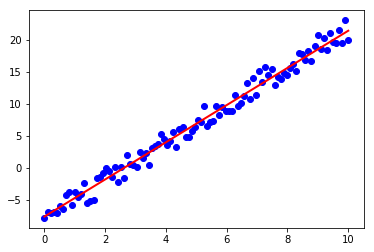

In [0]:
# Predict outputs for the training set inputs given the estimated weights
Y_pred = model.predict(X)

# 5. Plot the results including the data distribution with the estimated linear regression line
plt.scatter(X[:,1:], Y, color = 'blue')
plt.plot(X[:,1:], Y_pred, color='red', linewidth=2)
plt.show()

### 2.2.1 Logistic Regression

What's the problem here with linear regression model to fit the classification problem?

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

A solution for classification is logistic regression. 

Using the sigmoid function (also called logistic function), as shown below:

$$\sigma(z) = \frac{1}{1+ exp(-z)}$$

Here $z$ can be any real values where the output of sigmoid function will be the value between 0 and 1 (considered as the predicted probability).

The logistic regression model is given with: 

$$y = \sigma(\mathbf{w}^T\mathbf{x}) = \frac{1}{1+ exp(-\mathbf{w}^T\mathbf{x})}$$

where the standard linear formula is transformed to the logistic regression formula. 

For binary classification, the threshold is set to 0.5: if the output of the sigmoid function is above 0.5, we can classify the outcome as 1 (or YES), and if it is lower than 0.5, we can classify it as 0 (or NO).



In [0]:
## Write a logistic function, with the above formulas
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
#logistic(np.array([0.458,0.458]))

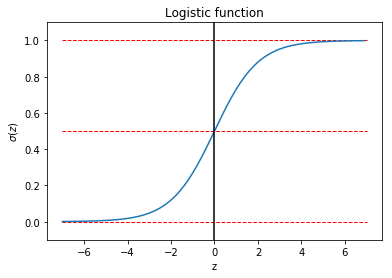

In [0]:
# Plot the logistic function
z = np.arange(-7,7,0.1)
sigma = logistic(z)
plt.plot(z,sigma)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic function')
plt.hlines(y=1.0, xmin = -7, xmax = 7, color = 'red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.5, xmin = -7, xmax = 7, color = 'red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.0, xmin = -7, xmax = 7, color = 'red', linewidth = 1, linestyle = '--')
plt.show()

### Exercise 2.2.1 What you discover from the logistic function plot? How can we classify?


It is observed that $\sigma(z)$ approaches 1 when $z \rightarrow \infty$, since $e^{-z}$ becomes very small for large values of z. Similarly, $\sigma(z)$ approaches 0 when $z \rightarrow -\infty$, since $e^{-z}$ becomes large for smaller values of z.

The logistic function takes real number values as input and transforms them to values in the range of $[0,1]$ with an intercept at 0.5.

For classification, we can set a threshold as 0.5, if the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

We're trying to learn the weight $w$ of the logistic regression model. But how we learn it?

* Require to define the objective function
* Require to select a method for minimizing (or maximizing) the objective function (analytical? numerical?)

### Define the objective function

Let D be the set of training examples $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i = 1}^N$. For logistic regression, we use the so-called **cross-entropy loss** (sometimes also called negative log-likelihood loss/objective), where $\widehat{y}^{(i)} = \sigma(\mathbf{w}^T\mathbf{x}^{(i)})$

$$CE(D|w) = -\sum_{i = 1}^N[{y}^{(i)}ln(\widehat{y})^{(i)} + (1-y^{(i)})ln(1-\widehat{y}^{(i)})]$$

Same as for the linear regression and square error, we want to find such parameters $\mathbf{w}$ that minimize the CE loss on the given training set. 

<mark>But how? Can we find an analytical solution?</mark>


Unfortunately, unlike the linear regression with the square error loss, the following equation: $$\nabla_{\mathbf{w}}CE(D|\mathbf{w}) = 0$$ **has no closed form (i.e., analytical) solution**.

We thus must resort to **iterative numeric optimization** to minimize the function $CE(D|\mathbf{w})$. This is the case for the vast majority of (modern) machine learning models. 



### Numerical Optimization

Most problems in machine learning require minimization / maximization of the loss / objective functions to learn the optimized parameters.

Let w* be the value of w which minimized the value of the function f(w). Mathematically, this is written as:
$$w^* = \operatorname*{argmin}_w f(w)$$

In few cases, we can solve this minimization problem analytically in closed form (i.e. solving for optimal $w^*$ in $\triangledown_wf(w^*)=0$).
(like in the case of the linear regression)

But in most cases it is too cumbersome (or impossible) to solve these equations analytically. So, it must be tackled numerically.

The most common ways to solve the problems with no closed-form solution is with **iterative algorithm**. 
These iterative algorithms construct a sequence of points for the parameter w as $w^{(0)}, w^{(1)} ...$ at each time step such that hopefully after a certain iteration steps $w^{(t+1)} = w^{(t)} = w^{*}$.

Such a sequence is called the minimizing sequence for the problem.

And **Gradient Descent** is one of the most common methods for **iterative algorithm**.


### Gradient Descent

Gradient descent method is an iterative optimization algorithm to find the optimum of a function. The intuition is as follows:


**Task**: find the value $w^*$ which minimizes the function f(w).
**Steps**:
1. Start at some (usually randomly initialized) point $w_0$ and compute the value of the gradient at the point $\nabla_{w_0}f(w)$

2. *Repeat until convergence*: take a step of length $\eta$ in the direction opposite of the gradient to compute the position for the next iteration: $w_{i+1} = w_i - \eta \nabla_{w_i}f(w)$

**Convergence** has been reached if $w_{i+1} = w_i$, that is, is we come to a point $w_i$ in which the gradient is zero ($\nabla_wf(w^*)=0$). 

The step length $\eta$ is called **learning rate**, and the iteration step we often called **epoch**.

<mark>What are the problems for the simple gradient descent?</mark>

#### Learning rate $\eta$

![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

The left figure shows what could happen if we choose a too small learning rate: although the cost decreases, the descent is too small that the algorithm would require a large number of epochs to converge.

The right figure shows what could happen if we choose a too large learning rate: instead of minimizing the cost function, the error becomes larger in every epoch because we overshoot the optimal point every time.

So we need to choose a proper learning rate.
Empirically: if the function value is dropping but very slowly across iterations, probably the chosen value is to small; if the function value is not dropping (but rather increasing or "jumping") than what you observe is probably divergence and most likely your learning rate is too big.

#### Stopping Criteria
It's normally not possible to reach full convergence due to the efficiency, or because of numerical issues (computers cannot perform exact arithmetic). Normallly we need to define a stopping criteria for the algorithm by:
* Define a maximum number of GD iterations (i.e. epochs)
* Or defining the minimal value ($\epsilon$) by which the function value should drop between consecutive iterations (i.e, the optimization stops when $w_{t} - w_{t+1} < \epsilon$).  

### Exercise 2.2.2 Find the numerical solution of Logistic Regression Model via Gradient Descent

1. Given the data related to the candidates who would get admitted to a prestigious university, there are 2 possible outcomes: admitted (with the value 1), and rejected (with the value 0)
2. Build a logistic regression model
    * Load the data into input data X and output data Y
    * Define the logistic function
    * Define the cross-entropy loss
    * Define the gradient descent algorithm
    * Define the learning rate and iteration steps
    * Train your model, check the loss results
3. Adjust the learning rate and epochs, any observation?

[Example from here](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)

In [0]:
## Two ways to load data from sources
# First way, Upload the file locally (need to use safari or chrome to open the colab)
from google.colab import files
uploaded = files.upload()

In [0]:
# Second way, upload your file to your Google Drive folder and load it 
# (It is required to change direction to the repository)
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Intro2ML/Session 1 (Basics of ML)/Exercises/With solutions"
%cd /content/drive/My\ Drive/Intro2ML/Session\ 1\ (Basics\ of\ ML)/Exercises/With\ solutions

In [0]:
## 1. Load the data into a dataframe
df = pd.read_csv("mark.txt", delimiter=',', header=None, names = ['exam1','exam2','admitted'])

# Create a dummy variable
df['dummy'] = [1]*len(df)
df = df[['dummy','exam1','exam2','admitted']]
df.head(5)

,dummy,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


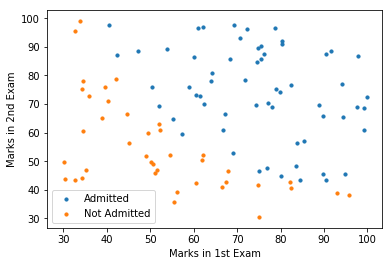

In [0]:
# Define X and y as input and output
data = df[['exam1','exam2','admitted']]
X = data.iloc[:, 0:2]
y = data.iloc[:, -1]

# Admitted is with admitted label=1 (i.e y==1)
admitted = data.loc[y == 1]

# Not-admitted is with admitted label=1 (i.e y==0)
not_admitted = data.loc[y == 0]

# Plot the data distribution, considering x-axis as exam1, y-axis as exam2
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [0]:
import numpy as np

class LogisticRegressionNUM:
    def __init__(self, lr=0.05, num_iter=1000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        
    # Define the logistic function
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Define the cross-entropy error as loss function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Add the intercept if the input data x is without the dummy variable
    def __add_intercept(self, x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)
    
    # Fit the training data
    def fit(self, x, y):
        if self.fit_intercept:
            x = self.__add_intercept(x)
            
        self.cost_ = []
        
        # Initialize the weight
        self.w = np.zeros((x.shape[1], ))
        m = x.shape[0]
        #m =1
        for _ in range(self.num_iter):
            z = np.dot(x, self.w)
            y_pred = self.__sigmoid(z)
            residuals = y_pred - y
            
            # Compute the gradient vector and the updated weights here
            gradient_vector = np.dot(x.T, residuals)
            self.w -= (self.lr / m) * gradient_vector
            
            # Calculate the loss here between the predicted and actual label 
            cost = self.__loss(y_pred, y)
            
            # Append the cost for each iteration
            self.cost_.append(cost)
        return self
  
    # Predict the unseen data x, if the predicted probability > 0.5, the class label is 1, else 0
    def predict(self, x):
        if self.fit_intercept:
            x = self.__add_intercept(x)
        pred_prob = self.__sigmoid(np.dot(x, self.w))
        return (pred_prob >= 0.5)*1

In [0]:
# Define an accuracy function, where if the actual match the predict, it's true else false
def accuracy(actual , predict):
    predict = predict.flatten()
    accuracy = np.mean(predict == actual)
    return accuracy * 100

In [0]:
# Define X and y as input and output
X = np.array(df[['dummy','exam1', 'exam2']])
y = np.array(df['admitted'])
print(X.shape, y.shape)

# Here since our X is including the dummy variable, so the fit_intercept is set to False
model = LogisticRegressionNUM(lr = 0.001, num_iter = 100000, fit_intercept=False)

# Fit the data into the model for training
model.fit(X, y)

# Get the learned parameters
parameters = model.w.reshape(3,)

# Predit the class label from X
y_pred = model.predict(X)

# Print the prediction
print(y_pred)

# Print the parameters
print(parameters)

# Print the accuracy
print(accuracy(y, y_pred))

# Print the model loss
print(model.cost_)


In [0]:
# Check the result with sklearn model, are they similar?
from sklearn.linear_model import LogisticRegression
X = np.array(df[['dummy','exam1', 'exam2']])
y = np.array(df['admitted'])

# Use the logistice regression model from sklearn
model= LogisticRegression(max_iter = 100000, fit_intercept = False, solver = 'sag')

# Fit the data into the model for training
model.fit(X,y)

# Get the learned parameters
parameters = model.coef_[0]

# Predit the class label from X
y_pred = model.predict(X)

# Print the prediction
print(y_pred)

# Print the parameters
print(parameters)

# Print the accuracy
print(accuracy(y, y_pred))

[0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
[-3.1130285   0.03263125  0.02483141]
83.0


In our dataset, the linear equation can be represented as:

$$h(w)= w_0 + w_1x_1 + w_2x_2$$

The decision boundary can be found by setting the weighted sum of inputs to 0. 

Equating h(w) to 0 gives us:

$$x_2 = -\frac{w_0+w_1x_1}{w_2}$$

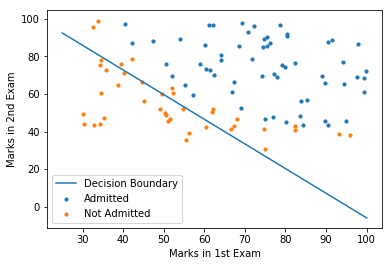

In [0]:
# More advanced: how to plot the logistic regression as a decision boundary to separate two classes
# For more detailed infos: you can check the explanation here: https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

# Given x1 values between 25 and 100 (as the x-axis values)
x_values = [25, 100]
# x_2 can be calculated as the following with the upper equations, using the learned parameters
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

# Plot the scatter plot as the separation of admitted and not-admitted points based on two marks in the exam
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')

# Mark the label
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

### Exercise 2.2.3 Find the numerical solution of Linear Regression Model
Need to modify the objective function above from logisitic regression

1. Given the randomly generated data the same as previous section in exercise 2.1.1
considering the linear regression model $$y = (-8) + 3 x_1$$
Assume that the data input $x_1$ is generated from **np.linspace(0,10,100)**,
and the data outputs are generated via $$y = (-8) + 3 x_1 + \epsilon$$

2. Build a linear regression model with numerical solution
    * Define the data into input data X and output data Y
    * Define the loss function as mean-squared error
    * Define the gradient descent algorithm
    * Define the learning rate and iteration steps
    * Train your model, check the loss results
3. Adjust the learning rate and epochs, any observation?

In [0]:
import numpy as np

# Build a linear regression model with numerical solution
class LinearRegressionNUM:
    def __init__(self, lr=0.05, n_iterations=1000, fit_intercept=True):
        self.lr = lr
        self.n_iterations = n_iterations
        self.fit_intercept = fit_intercept
    
    # Define the loss function as mean-squared error between the predict and actual label
    def __loss(self, h, y):
        return ((h-y)**2).mean()
    
    # Add the intercept if the input data x is without the dummy variable
    def __add_intercept(self, x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)
     
    # Fit the training data
    def fit(self, x, y):
        if self.fit_intercept:
            x = self.__add_intercept(x)
            
        self.cost_ = []
        self.w = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w)
            residuals = y_pred - y
            
            # Compute the gradient vector and the updated weights here
            gradient_vector = np.dot(x.T, residuals)
            self.w -= (self.lr / m) * gradient_vector
            
            # Calculate the loss here between the predicted and actual label
            cost = self.__loss(y_pred, y)
            
            # Append the cost for each iteration
            self.cost_.append(cost)
        return self
    
    # Predict the value for unseen data
    def predict(self, x):
        if self.fit_intercept:
            x = self.__add_intercept(x)
        return np.dot(x, self.w)

In [0]:
# Run the following code to check if your result is close to [-8, 3]

np.random.seed(0)
x1 = np.linspace(0,10,100)
x0 = np.ones(100)
delta = np.random.uniform(-2,2, size=(100,1))

W = np.array([-8,3]).reshape(2,1) # (2,1)
X = np.array([x0,x1]).T # (100,2)
Y = np.dot(X,W)+delta 
Y = Y.reshape(Y.shape[0],1) # (100,)


model = LinearRegressionNUM(lr=0.05, n_iterations=1000, fit_intercept=False)
model.fit(X,Y)
print('Parameters:',model.w)
print('Loss:', model.cost_)

Parameters: [[-7.60855759]
 [ 2.89994806]]
Loss: [120.22990259941147, 69.01994044802113, 42.82906909060298, 29.349974625582245, 22.33160620364767, 18.598919223287332, 16.53918928744623, 15.333204117000834, 14.564782365597408, 14.022446388768229, 13.59869088130293, 13.238820901177771, 12.914966411670758, 12.612884092914618, 12.325253867103704, 12.048274119638496, 11.779932344249982, 11.519126744866377, 11.265220043533052, 11.017812808976785, 10.776628281897784, 10.54145383112237, 10.3121111739638, 10.08844120716411, 9.87029625969781, 9.657536116227778, 9.450025956721282, 9.24763527029587, 9.050237264859602, 8.857708529522066, 8.669928826319705, 8.486780948528514, 8.308150613682356, 8.13392637508211, 7.96399954353897, 7.798264115137216, 7.636616702855878, 7.478956470931837, 7.325185071377754, 7.175206582337963, 7.028927448103096, 6.886256420674472, 6.747104502805561, 6.611384892466442, 6.479012928687315, 6.349906038742512, 6.223983686639615, 6.101167322880342, 5.9813803354612665, 5.86454

In [0]:
# You can also simply use the scikit learn model, are the results similar?
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, Y)
model.coef_

array([[-7.60858727,  2.89995253]])

### Exercise 2.2.4 For initialize different starting point of x, the result will be different for the gradient descent methods

Consider the function $f(x)= (x+2)^2-16exp(-(x-2)^2)$.

1. Make a function get_y(x) that computes the function value given x
2. Draw a plot around $x\in [-8,8]$
3. Calculate the derivative of the function f(x), implement the function get_grad(x)
4. Write the gradient descent function gradient_descent()
5. Two scenarios: what are the results if x_0 = -8, and how about x_0 = 8?
6. How about changing the learning rate (lr), iteration steps(max_iter), and precision(prec)?

In [0]:
#1. Make a function that computes the function value given x
def get_y(x):
    return (x+2)**2-16*np.exp(-((x-2)**2))

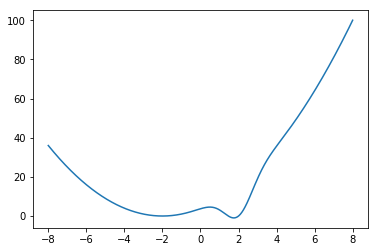

In [0]:
#2. Draw a plot around x in [-8,8]
x = np.arange(-8, 8, 0.001)
y = np.array([get_y(u) for u in x])
plt.plot(x,y)
plt.show()

In [0]:
#3. Calculate the derivative of the function f(x), implement the function get_grad(x)
def get_grad(x):
    return (2*x+4)-16*(-2*x+4)*np.exp(-((x-2)**2))

In [0]:
#4. Write the gradient descent function gradient_descent()
def gradient_descent(start_x, func, grad, prec=0.0001, lr = 0.1, max_iter = 100):
    prec = prec
    lr = lr
    max_iter = max_iter
    x_new = start_x
    res = []
    for i in range(max_iter):
        x_old = x_new
        x_new = x_old - lr * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new, f_x_new])
        if (abs(f_x_new - f_x_old)<prec):
            print("Change in function values too small, leaving")
            print('Converging point:', x_new)
            print('Minimized value:', f_x_new)
            return np.array(res)
    print('Exceeded maximum number of iterations, leaving')
    print('Converging point:', x_new)
    print('Minimized value:', f_x_new)
    return(np.array(res))

Change in function values too small, leaving
Converging point: -2.011600506267682
Minimized value: 0.00013293098384661487


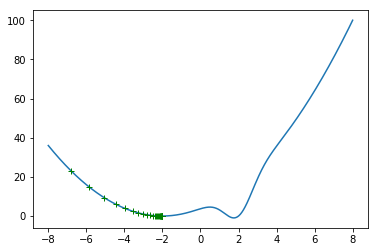

In [0]:
#5.1 What's the result if x_0 = -8?
x_0 = -8
res = gradient_descent(x_0, get_y, get_grad)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+',)
plt.show()

Change in function values too small, leaving
Converging point: 1.7530830082928162
Minimized value: -0.9680214665375022


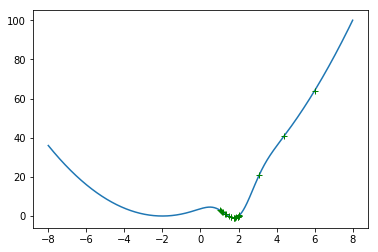

In [0]:
#5.2 What's the result if x_0 = 8?
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

Now that the algorithm converged to the global minimum. However, note that getting to the global minimum, the sequence of points jumped from one side of the minimum to the other.

In [0]:
res

array([[ 6.        , 63.9999982 ],
       [ 4.39999856, 40.90956343],
       [ 3.09579816, 21.15177811],
       [ 1.02130145,  2.9887958 ],
       [ 1.61877858, -0.7402349 ],
       [ 1.94992301, -0.35803519],
       [ 1.31978342,  0.94760383],
       [ 2.02623978,  0.22161937],
       [ 1.13708233,  2.2427023 ],
       [ 1.82105621, -0.89531119],
       [ 1.61141974, -0.71528469],
       [ 1.95832504, -0.30389818],
       [ 1.29978849,  1.08948428],
       [ 2.01212209,  0.09947458],
       [ 1.17091269,  2.00846292],
       [ 1.87093466, -0.75154668],
       [ 1.50293396, -0.22677184],
       [ 2.04474566,  0.39197016],
       [ 1.09289682,  2.53906224],
       [ 1.74915092, -0.96808581],
       [ 1.75308301, -0.96802147]])

Exceeded maximum number of iterations, leaving
Converging point: 6.185668025073309
Minimized value: 67.00516062283093


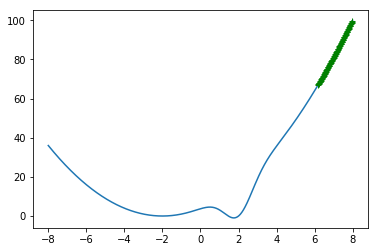

In [0]:
#6. How about changing the learning rate (lr), iteration steps(max_iter), and precision(prec)?
# Default value:  prec=0.0001, lr = 0.1, max_iter = 100
# If lr smaller, lr = 0.001, max_iter unchanged
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad, prec=0.0001, lr = 0.001, max_iter = 100)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

Change in function values too small, leaving
Converging point: 1.7612901488879322
Minimized value: -0.9664676312988725


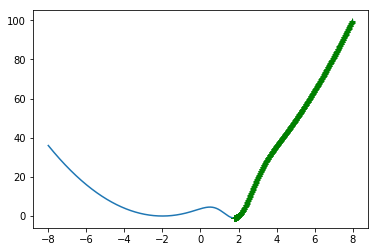

In [0]:
# If lr smaller, lr = 0.001, max_iter increase
# Default value:  prec=0.0001, lr = 0.1, max_iter = 100
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad, prec=0.0001, lr = 0.001, max_iter = 1000)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

Exceeded maximum number of iterations, leaving
Converging point: 1.906115691409945
Minimized value: -0.6018516987516911


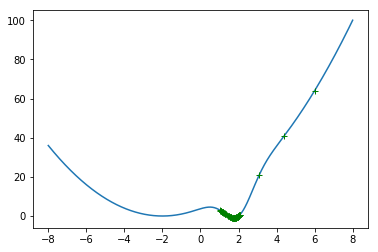

In [0]:
# If prec smaller, seems like will never reach to the convergence if max_iter unchanged
# Default value:  prec=0.0001, lr = 0.1, max_iter = 100
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad, prec=0.00001, lr = 0.1, max_iter = 100)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()